In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('prepared_data_2.csv')

In [3]:
df.sort_values(by='AMT_INCOME_TOTAL')

,FLAG_GENDER_MALE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,OCCUPATION_TYPE,College_Education,Currently_Married,Marriage_Status,Paying_Housing,White_Collar,AGE_YR,YRS_WORKED,target_paid_1
2476,0,0,0,0,27000.0,Managers,1,1,Married,1,1,40.0,13.0,1
2475,0,0,0,0,27000.0,Managers,1,1,Married,1,1,40.0,13.0,1
2313,0,0,1,0,32400.0,Managers,0,1,Married,1,1,52.0,15.0,1
1635,0,0,0,0,36000.0,Core staff,0,1,Married,0,1,39.0,1.0,0
1059,0,0,1,0,40500.0,Cleaning staff,0,1,Married,1,0,34.0,13.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,1,1,0,0,1350000.0,Managers,1,1,Married,0,1,35.0,4.0,1
1659,1,1,0,0,1350000.0,Managers,1,1,Married,0,1,35.0,4.0,1
66,1,1,0,0,1350000.0,Managers,1,1,Married,0,1,35.0,4.0,1
67,1,1,0,0,1350000.0,Managers,1,1,Married,0,1,35.0,4.0,1


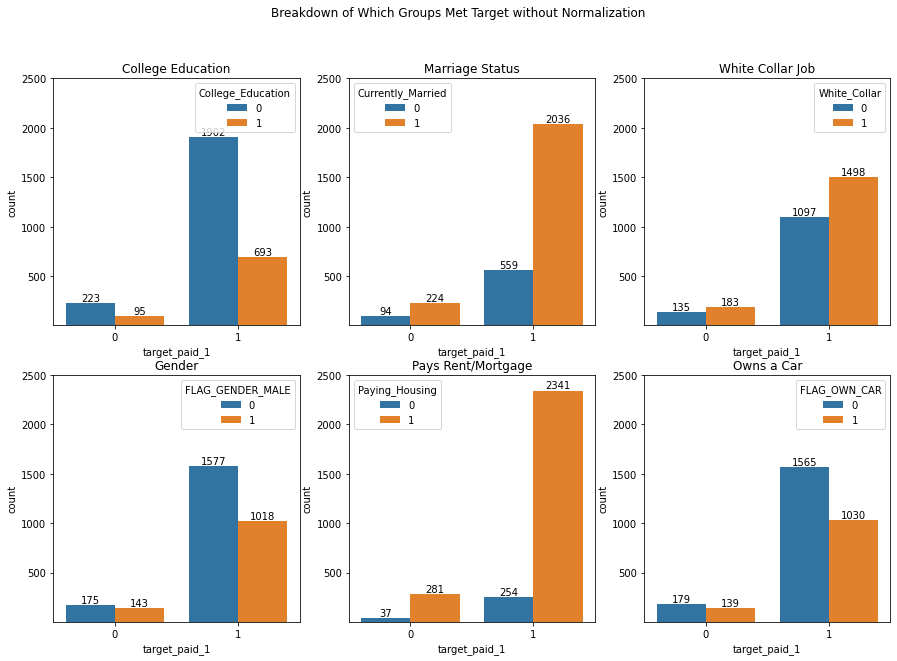

In [7]:
from re import X
from turtle import position
from matplotlib.pyplot import suptitle


fig, axes = plt.subplots(2, 3, figsize=(15, 10))

fig.suptitle('Breakdown of Which Groups Met Target without Normalization')
ax1 = sns.countplot(ax=axes[0,0], data=df, x='target_paid_1', hue='College_Education')
ax2 = sns.countplot(ax=axes[0,1], data=df, x='target_paid_1', hue='Currently_Married')
ax3 = sns.countplot(ax=axes[0,2], data=df, x='target_paid_1', hue='White_Collar')
ax4 = sns.countplot(ax=axes[1,0], data=df, x='target_paid_1', hue='FLAG_GENDER_MALE')
ax5 = sns.countplot(ax=axes[1,1], data=df, x='target_paid_1', hue='Paying_Housing')
ax6 = sns.countplot(ax=axes[1,2], data=df, x='target_paid_1', hue='FLAG_OWN_CAR')



ax1.set(title="College Education",ylim=(1,2500))
#sns.move_legend(ax1,loc='upper left')
ax2.set(title="Marriage Status",ylim=(1,2500))
ax3.set(title="White Collar Job",ylim=(1,2500))
ax4.set(title="Gender",ylim=(1,2500))
ax5.set(title="Pays Rent/Mortgage",ylim=(1,2500))
ax6.set(title="Owns a Car",ylim=(1,2500))

for x in axes.flat:
    #sns.move_legend(x,loc='upper left')
    for i in x.containers:
        x.bar_label(i,)





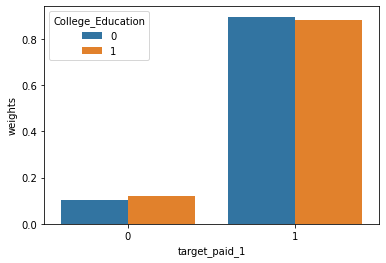

In [8]:
college_table = df.groupby(['target_paid_1', 'College_Education']).size()
college_proportions= college_table/df.groupby('College_Education').aggregate('count')['target_paid_1']
cdf = college_proportions.to_frame(name="weights")
cdf.reset_index(inplace=True)
sns.barplot(data=cdf, x='target_paid_1', y='weights', hue='College_Education')


married_table = df.groupby(['target_paid_1', 'Currently_Married']).size()
married_proportions= married_table/df.groupby('Currently_Married').aggregate('count')['target_paid_1']
marrieddf = married_proportions.to_frame(name="weights")
marrieddf.reset_index(inplace=True)

wc_table = df.groupby(['target_paid_1', 'White_Collar']).size()
wc_proportions= wc_table/df.groupby('White_Collar').aggregate('count')['target_paid_1']
wcdf = wc_proportions.to_frame(name="weights")
wcdf.reset_index(inplace=True)

ph_table = df.groupby(['target_paid_1', 'Paying_Housing']).size()
ph_proportions= ph_table/df.groupby('Paying_Housing').aggregate('count')['target_paid_1']
phdf = ph_proportions.to_frame(name="weights")
phdf.reset_index(inplace=True)

male_table = df.groupby(['target_paid_1', 'FLAG_GENDER_MALE']).size()
male_proportions= male_table/df.groupby('FLAG_GENDER_MALE').aggregate('count')['target_paid_1']
mdf = male_proportions.to_frame(name="weights")
mdf.reset_index(inplace=True)

car_table = df.groupby(['target_paid_1', 'FLAG_OWN_CAR']).size()
car_proportions= car_table/df.groupby('FLAG_OWN_CAR').aggregate('count')['target_paid_1']
cardf = car_proportions.to_frame(name="weights")
cardf.reset_index(inplace=True)


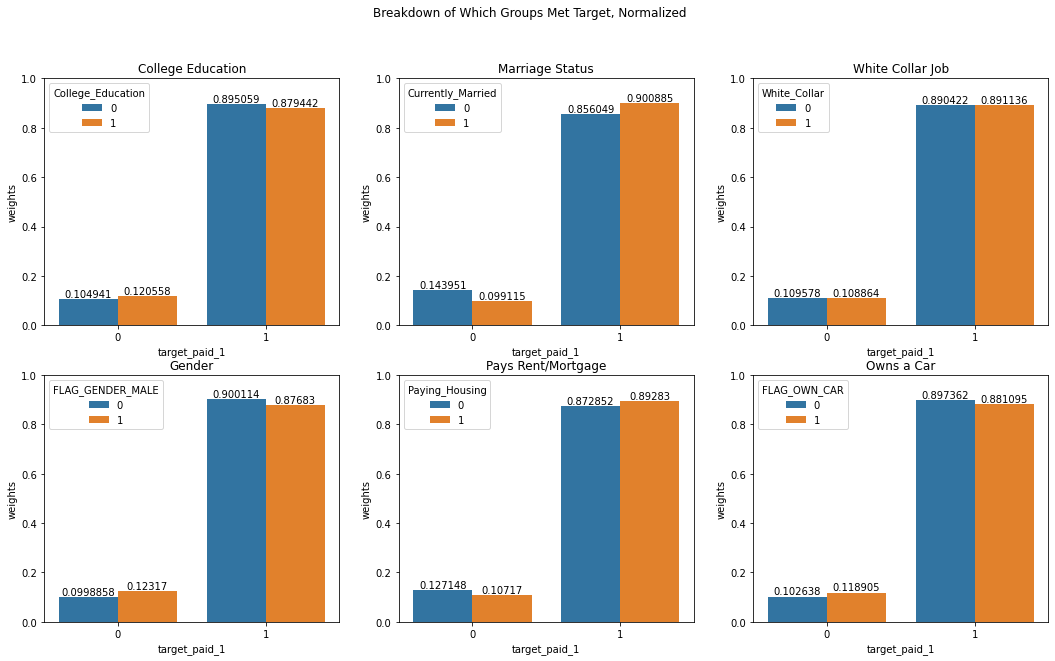

In [10]:
from matplotlib.pyplot import suptitle


fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Breakdown of Which Groups Met Target, Normalized')
ax1 = sns.barplot(ax = axes[0,0],data=cdf, x='target_paid_1', y='weights', hue='College_Education')
ax2= sns.barplot(ax=axes[0,1], data=marrieddf, x='target_paid_1', y='weights', hue='Currently_Married')
ax3 = sns.barplot(ax = axes[0,2],data=wcdf, x='target_paid_1', y='weights', hue='White_Collar')
ax4= sns.barplot(ax=axes[1,0], data=mdf, x='target_paid_1', y='weights', hue='FLAG_GENDER_MALE')
ax5 = sns.barplot(ax=axes[1,1], data=phdf, x='target_paid_1', y='weights', hue='Paying_Housing')
ax6 = sns.barplot(ax=axes[1,2], data=cardf, x='target_paid_1', y='weights', hue='FLAG_OWN_CAR')

ax1.set(title="College Education",ylim=(0,1))
ax2.set(title="Marriage Status",ylim=(0,1))
ax3.set(title="White Collar Job",ylim=(0,1))
ax4.set(title="Gender",ylim=(0,1))
ax5.set(title="Pays Rent/Mortgage",ylim=(0,1))
ax6.set(title="Owns a Car",ylim=(0,1))

for x in axes.flat:
    #sns.move_legend(x,loc='upper left')
    for i in x.containers:
        x.bar_label(i,)


In [55]:
college_table = df.groupby(['target_paid_1', 'College_Education']).size()
college_proportions= college_table/df.groupby('target_paid_1').aggregate('count')['College_Education']
cdf = college_proportions.to_frame(name="weights")
cdf1 = cdf.pivot_table(index = 'target_paid_1', columns = 'College_Education', values = 'weights')

married_table = df.groupby(['target_paid_1', 'Currently_Married']).size()
married_proportions= married_table/df.groupby('target_paid_1').aggregate('count')['Currently_Married']
mdf = married_proportions.to_frame(name="weights")
mdf1 = mdf.pivot_table(index = 'target_paid_1', columns = 'Currently_Married', values = 'weights')

wc_table = df.groupby(['target_paid_1', 'White_Collar']).size()
wc_proportions= wc_table/df.groupby('target_paid_1').aggregate('count')['White_Collar']
wdf = wc_proportions.to_frame(name="weights")
wdf1 = wdf.pivot_table(index = 'target_paid_1', columns = 'White_Collar', values = 'weights')

ph_table = df.groupby(['target_paid_1', 'Paying_Housing']).size()
ph_proportions= ph_table/df.groupby('target_paid_1').aggregate('count')['Paying_Housing']
phdf = ph_proportions.to_frame(name="weights")
phdf1 = phdf.pivot_table(index = 'target_paid_1', columns = 'Paying_Housing', values = 'weights')

male_table = df.groupby(['target_paid_1', 'FLAG_GENDER_MALE']).size()
male_proportions= male_table/df.groupby('target_paid_1').aggregate('count')['FLAG_GENDER_MALE']
maledf = male_proportions.to_frame(name="weights")
maledf1 = maledf.pivot_table(index = 'target_paid_1', columns = 'FLAG_GENDER_MALE', values = 'weights')

car_table = df.groupby(['target_paid_1', 'FLAG_OWN_CAR']).size()
car_proportions= car_table/df.groupby('target_paid_1').aggregate('count')['FLAG_OWN_CAR']
cardf = car_proportions.to_frame(name="weights")
cardf1 = cardf.pivot_table(index = 'target_paid_1', columns = 'FLAG_OWN_CAR', values = 'weights')


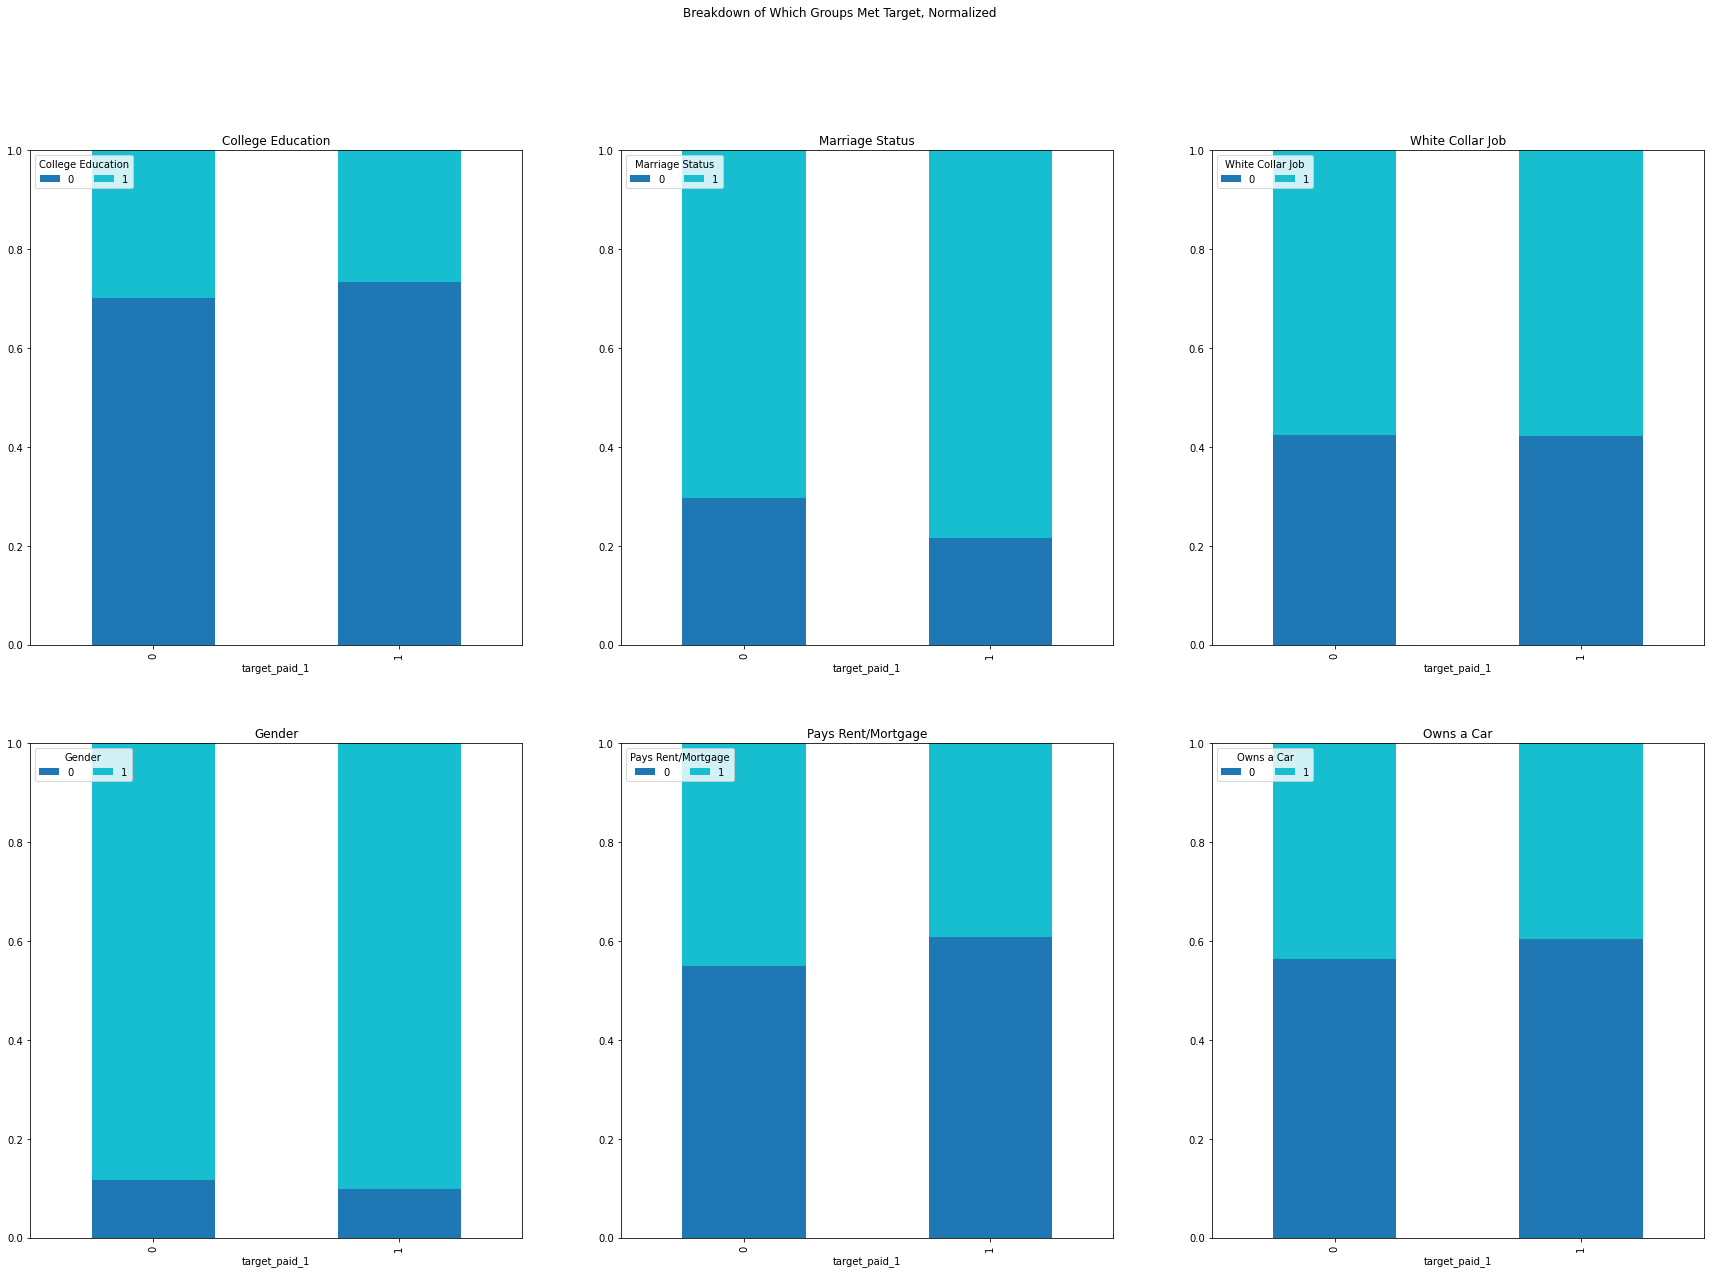

In [67]:
from matplotlib.pyplot import suptitle


fig, axes = plt.subplots(2, 3, figsize=(30, 20))
fig.suptitle('Breakdown of Which Groups Met Target, Normalized')
ax1 = cdf1.plot(ax = axes[0,0], kind='bar', stacked=True, colormap='tab10')
ax2 = mdf1.plot(ax = axes[0,1], kind='bar', stacked=True, colormap='tab10')
ax3 = wdf1.plot(ax = axes[0,2], kind='bar', stacked=True, colormap='tab10')
ax4 = phdf1.plot(ax = axes[1,0], kind='bar', stacked=True, colormap='tab10')
ax5 = maledf1.plot(ax = axes[1,1], kind='bar', stacked=True, colormap='tab10')
ax6 = cardf1.plot(ax = axes[1,2], kind='bar', stacked=True, colormap='tab10')

ax1.set(title="College Education",ylim=(0,1))
ax2.set(title="Marriage Status",ylim=(0,1))
ax3.set(title="White Collar Job",ylim=(0,1))
ax4.set(title="Gender",ylim=(0,1))
ax5.set(title="Pays Rent/Mortgage",ylim=(0,1))
ax6.set(title="Owns a Car",ylim=(0,1))

ax1.legend(loc="upper left", ncol=2, title = "College Education")
ax2.legend(loc="upper left", ncol=2, title = "Marriage Status")
ax3.legend(loc="upper left", ncol=2, title = "White Collar Job")
ax4.legend(loc="upper left", ncol=2, title = "Gender")
ax5.legend(loc="upper left", ncol=2, title = "Pays Rent/Mortgage")
ax6.legend(loc="upper left", ncol=2, title = "Owns a Car")



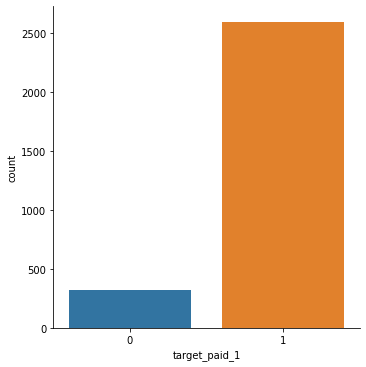

In [11]:
sns.catplot(x='target_paid_1', kind='count',data=df)

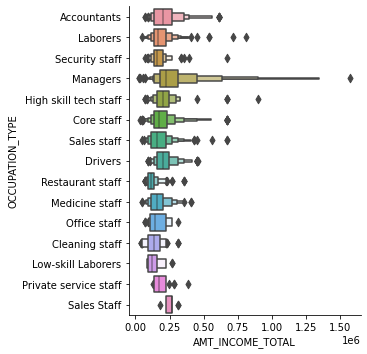

In [12]:
sns.catplot(y='OCCUPATION_TYPE', x='AMT_INCOME_TOTAL', kind='boxen',data=df)

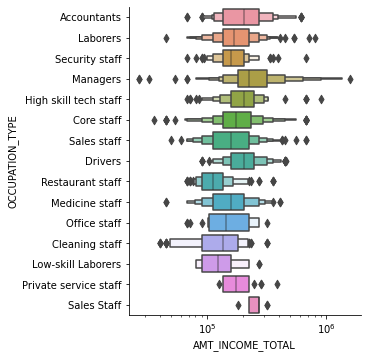

In [13]:

sns.catplot(y='OCCUPATION_TYPE', x='AMT_INCOME_TOTAL', kind='boxen',data=df)
plt.xscale('log')

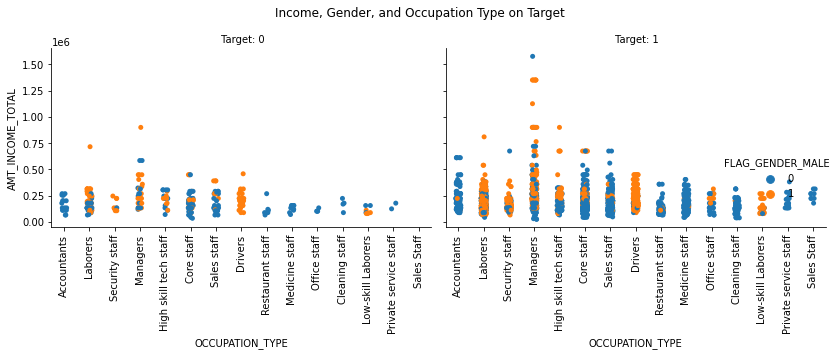

In [15]:


income_view = sns.catplot(y='AMT_INCOME_TOTAL',hue='FLAG_GENDER_MALE', x='OCCUPATION_TYPE', col='target_paid_1', kind='strip', data=df)
(income_view.set_xticklabels(rotation=90)
.set_titles(col_template=" Target: {col_name}")
)
#sns.move_legend(income_view,"lower center" ,bbox_to_anchor=(.5, -.1), ncol=2, frameon=True,title="Legend", labels=['Female','Male'])
plt.suptitle('Income, Gender, and Occupation Type on Target')
plt.tight_layout()


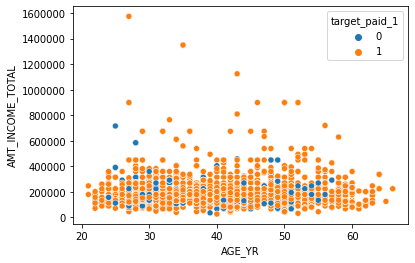

In [16]:
sns.scatterplot(x='AGE_YR', y= 'AMT_INCOME_TOTAL',hue='target_paid_1', data=df)

plt.ticklabel_format(style='plain', axis='both')

In [17]:
df.groupby('College_Education')['target_paid_1'].value_counts(normalize=True)

College_Education  target_paid_1
0                  1                0.895059
                   0                0.104941
1                  1                0.879442
                   0                0.120558
Name: target_paid_1, dtype: float64

In [18]:
df.groupby(["White_Collar", "OCCUPATION_TYPE"] ).count()

FLAG_GENDER_MALE  FLAG_OWN_CAR  \
White_Collar OCCUPATION_TYPE                                         
0            Cleaning staff                       58            58   
             Drivers                             249           249   
             Laborers                            693           693   
             Low-skill Laborers                   32            32   
             Private service staff                20            20   
             Restaurant staff                     99            99   
             Security staff                       81            81   
1            Accountants                         139           139   
             Core staff                          441           441   
             High skill tech staff               172           172   
             Managers                            361           361   
             Medicine staff                      159           159   
             Office staff                         32            32   
             Sales Staff                           9             9   
             Sales staff                         368           368   

                                    FLAG_OWN_REALTY  CNT_CHILDREN  \
White_Collar OCCUPATION_TYPE                                        
0            Cleaning staff                      58            58   
             Drivers                            249           249   
             Laborers                           693           693   
             Low-skill Laborers                  32            32   
             Private service staff               20            20   
             Restaurant staff                    99            99   
             Security staff                      81            81   
1            Accountants                        139           139   
             Core staff                         441           441   
             High skill tech staff              172           172   
             Managers                           361           361   
             Medicine staff                     159           159   
             Office staff                        32            32   
             Sales Staff                          9             9   
             Sales staff                        368           368   

                                    AMT_INCOME_TOTAL  College_Education  \
White_Collar OCCUPATION_TYPE                                              
0            Cleaning staff                       58                 58   
             Drivers                             249                249   
             Laborers                            693                693   
             Low-skill Laborers                   32                 32   
             Private service staff                20                 20   
             Restaurant staff                     99                 99   
             Security staff                       81                 81   
1            Accountants                         139                139   
             Core staff                          441                441   
             High skill tech staff               172                172   
             Managers                            361                361   
             Medicine staff                      159                159   
             Office staff                         32                 32   
             Sales Staff                           9                  9   
             Sales staff                         368                368   

                                    Currently_Married  Marriage_Status  \
White_Collar OCCUPATION_TYPE                                             
0            Cleaning staff                        58               58   
             Drivers                              249              249   
             Laborers                             693              693   
             Low-skill La

In [19]:
#Combine Like Groups 

jobCategories = {
    #White Collar
    'Waiters/barmen staff': 'Restaurant staff', #Waiters has 18
    'Cooking staff': 'Restaurant staff', #Now restaurant has 99,
    #Blue Collar
    'HR staff': 'Office staff', #13
    'Secretaries': 'Office staff', #10
    'IT staff': 'Office staff', #9, Office Staff has 32 Total
    'Realty agents': 'Sales Staff', #Realty agents technically do sales too.
}